In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sbn

In [4]:
df=pd.read_csv("Pokemon.csv",index_col=0,encoding = 'unicode_escape')
df.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,3,False
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,2,False
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False


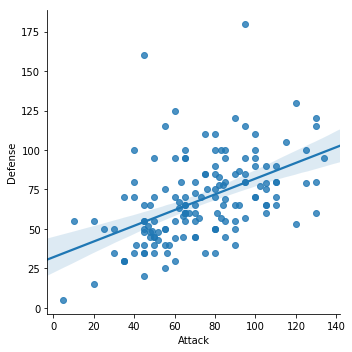

In [5]:
sbn.lmplot(x='Attack',y='Defense',data=df)

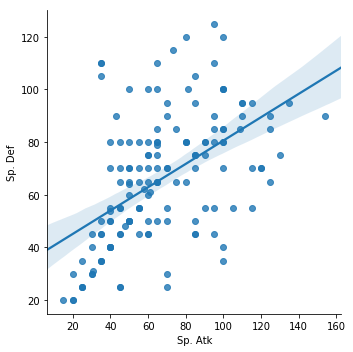

In [7]:
sbn.lmplot(x='Sp. Atk',y='Sp. Def',data=df)

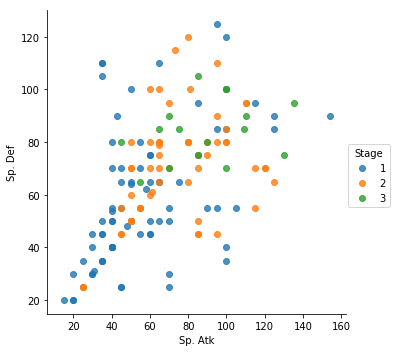

In [9]:
sbn.lmplot(x='Sp. Atk',y='Sp. Def',data=df,
           fit_reg=False,hue='Stage')

(0, 300)

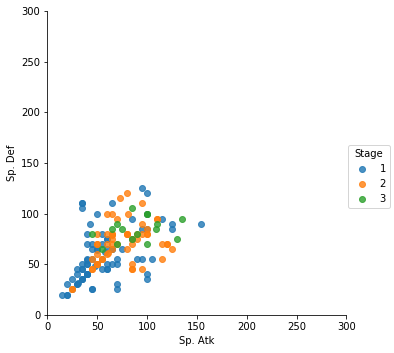

In [11]:
sbn.lmplot(x='Sp. Atk',y='Sp. Def',data=df,
           fit_reg=False,hue='Stage')


plt.xlim(0,300)
plt.ylim(0,300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

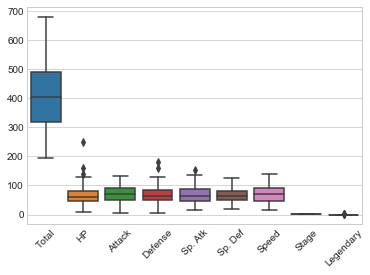

In [56]:
sbn.boxplot(data=df)
plt.xticks(rotation=45)

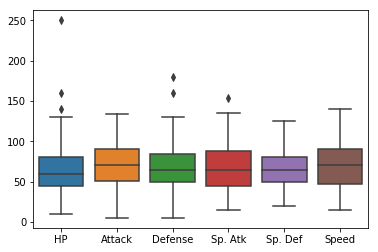

In [13]:
df1=df.drop(columns=['Total','Stage','Legendary'],axis=1)
sbn.boxplot(data=df1)

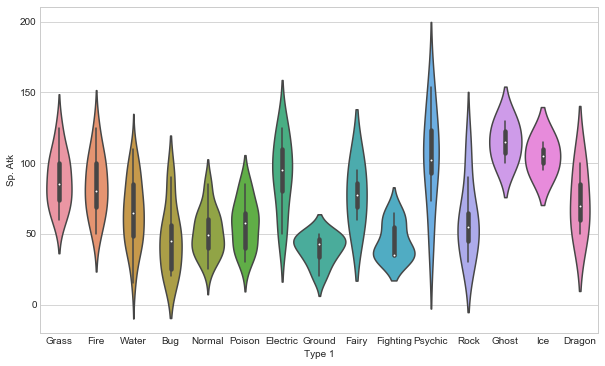

In [30]:
sbn.set_style('whitegrid')

plt.figure(figsize=(10,6))
sbn.violinplot(x='Type 1',y='Sp. Atk',data=df,width=1.4)


In [19]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

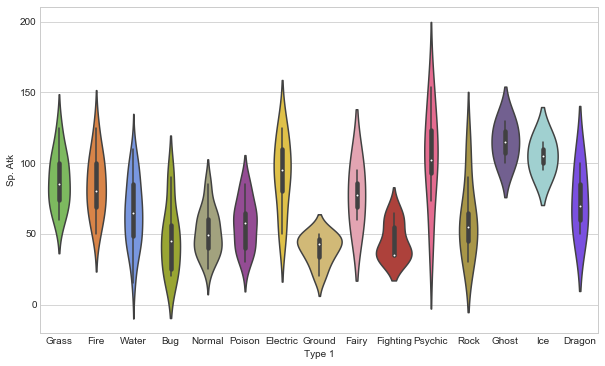

In [31]:
plt.figure(figsize=(10,6))
sbn.violinplot(x='Type 1',y='Sp. Atk',data=df,width=1.2,palette=pkmn_type_colors)

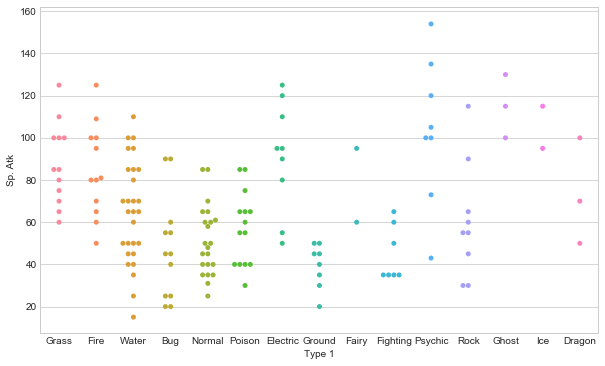

In [28]:
plt.figure(figsize=(10,6))
sbn.swarmplot(x='Type 1',y='Sp. Atk',data=df)

Text(0.5,1,'Sp. Atk by type')

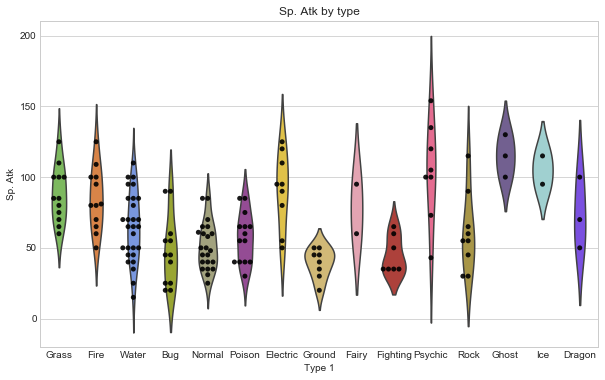

In [35]:
plt.figure(figsize=(10,6))
sbn.violinplot(x='Type 1',y='Sp. Atk',data=df,inner=None,palette=pkmn_type_colors)
sbn.swarmplot(x='Type 1',y='Sp. Atk',data=df,color='k',alpha=0.9)

plt.title('Sp. Atk by type')

In [36]:
df1.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [38]:
melted_df=pd.melt(df1,
                  id_vars=['Name','Type 1','Type 2'],
                 var_name='Stat_New')
melted_df.head()


,Name,Type 1,Type 2,Stat_New,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [39]:
print(df1.shape)
print(melted_df.shape)

(151, 9)
(906, 5)


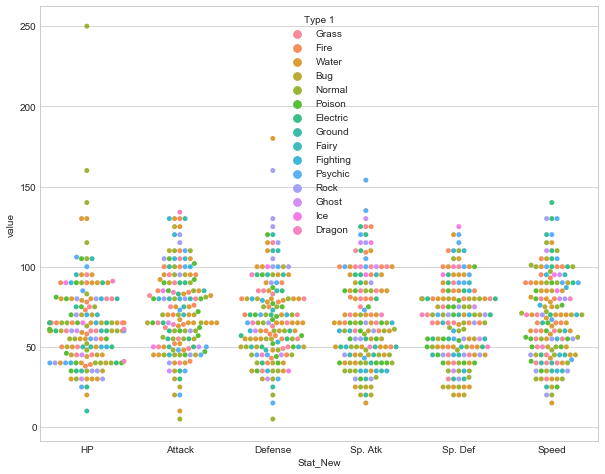

In [45]:
plt.figure(figsize=(10,8))
sbn.swarmplot(x='Stat_New',y='value',data=melted_df,
             hue ='Type 1')

C:\Users\Sushiil\Anaconda3\lib\site-packages\seaborn\categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


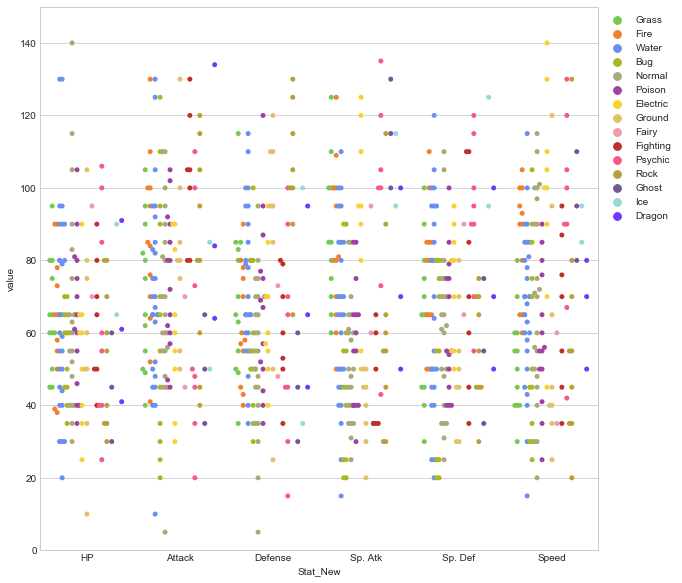

In [47]:
plt.figure(figsize=(10,10))
sbn.swarmplot(x='Stat_New',y='value',data=melted_df,
             hue ='Type 1',
             split=True,
             palette=pkmn_type_colors)
plt.ylim(0,150)
plt.legend(bbox_to_anchor=(1,1),loc=2)

In [49]:
corr=df1.corr()

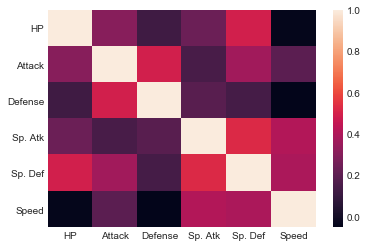

In [50]:
sbn.heatmap(corr)

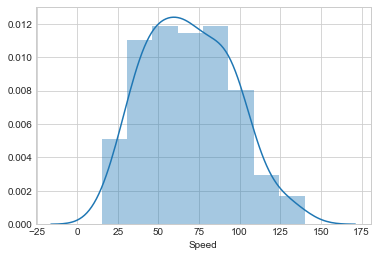

In [54]:
sbn.distplot(df.Speed)

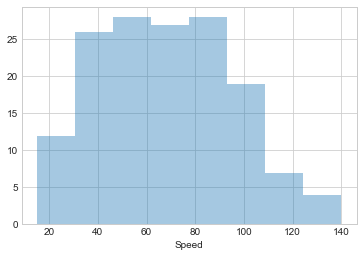

In [59]:
sbn.distplot(df.Speed,kde=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

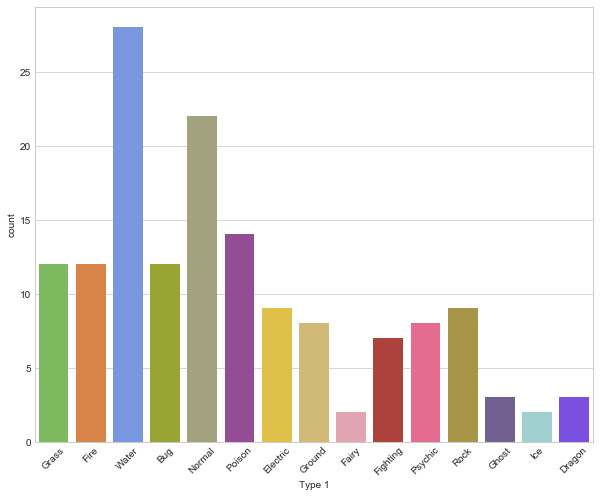

In [63]:
plt.figure(figsize=(10,8))
sbn.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
plt.xticks(rotation=45)

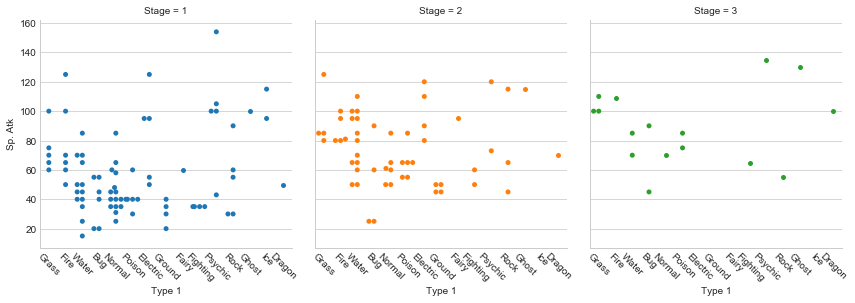

In [70]:
plt.figure(figsize=(10,8))
g=sbn.factorplot(x='Type 1',y='Sp. Atk',data=df,
             hue ='Stage',
             col='Stage',
             kind='swarm')
#plt.xticks(rotation=-45)
g.set_xticklabels(rotation=-45)
             

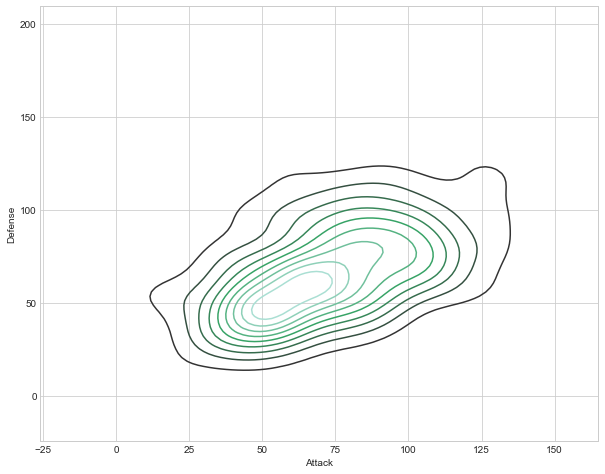

In [72]:
plt.figure(figsize=(10,8))
sbn.kdeplot(df.Attack,df.Defense)


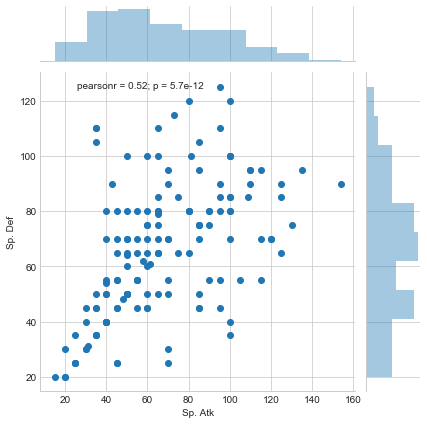

In [75]:
plt.figure(figsize=(10,8))
sbn.jointplot(x='Sp. Atk',y='Sp. Def',data=df)